## Sales Forecasting using Walmart data set.

<img width="450" align="left" src="https://miro.medium.com/max/2760/1*gsUixexI9DsFfKsS-ZZqng.png">

Sales forecast is an indicator of a product quantity that is likely to be sold in a time period in a specified market at given price. In other words, accurate sales forecasting enables a company to produce the required quantity at the right time in order to meet the future demand. [1]

In this project, I used a machine learning approach to forecast sales for each departemnt of each of 45 Walmart stores based on [Walmart data set](https://github.com/apadhye90/data-mining/tree/master/Kaggle%20Dataset) [2]


> [1] [Sales Forecasting: Meaning, Importance and Methods](https://www.businessmanagementideas.com/sales/forecasting-sales/sales-forecasting-meaning-importance-and-methods/7122)
<br>
[2] [Walmart Recruiting - Store Sales Forecasting: Overview](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)

<br>

### Table of Contents

<br>

### General Setup
___

In [1]:
# Dataframes.
import pandas as pd

# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Change style and size of plots
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.titlesize"] = 15

<br>

### Exploratory Data Analysis.
___

The data set consists of 4 csv files: stores, train, test, features. [3] First, I will analyse them separately. [4]

> [3] [Walmart Recruiting - Store Sales Forecasting: Data Description](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)
<br>
[4] [Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14)

<br>

#### Stores.

_1. Load the file._

In [3]:
# Load the stores.csv without an index.
stores = pd.read_csv("Walmart Data Set/stores.csv", index_col = False)

# Display the dafaframe and use the first column as the index
stores.set_index("Store")

,Type,Size,Store A,Store B,Store C
Store,,,,,
1,A,151315,219622.0000,140167.0000,42988.00000
2,A,202307,39690.0000,34875.0000,39690.00000
4,A,205863,177247.7273,101190.7059,40541.66667
6,A,202505,NaN,NaN,NaN
8,A,155078,NaN,NaN,NaN
11,A,207499,NaN,NaN,NaN
13,A,219622,NaN,NaN,NaN
14,A,200898,NaN,NaN,NaN
19,A,203819,NaN,NaN,NaN


The stores file consist of information about 45 stores, including the type and size of each. We can observe that there are mainly empty values in the columns Store A, Store B and Store C. 


In [4]:
stores.describe()

,Store,Size,Store A,Store B,Store C
count,45.000000,45.000000,3.000000,3.000000,3.000000
mean,23.000000,130287.600000,145519.909100,92077.568633,41073.222223
std,13.133926,63825.271991,94068.443124,53234.277201,1712.049789
min,1.000000,34875.000000,39690.000000,34875.000000,39690.000000
25%,12.000000,70713.000000,108468.863650,68032.852950,40115.833335
50%,23.000000,126512.000000,177247.727300,101190.705900,40541.666670
75%,34.000000,202307.000000,198434.863650,120678.852950,41764.833335
max,45.000000,219622.000000,219622.000000,140167.000000,42988.000000



<br>

_2. Data cleaning._

The first step to cleansing the data is by checking it for empty values.

In [5]:
# Check for empty values.
stores.isnull().sum()

Store       0
Type        0
Size        0
Store A    42
Store B    42
Store C    42
dtype: int64

The above confirms that only the last three columns have the empty values. Since they do not provide enough information that could be valuable in the sales forecasting, they will be removed.

In [6]:
# Remove columns with empty values.
cleaned_stores = stores.drop(['Store A','Store B','Store C'], axis=1)

# Check for empty values again.
cleaned_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

<br>

_3. Plotting data_

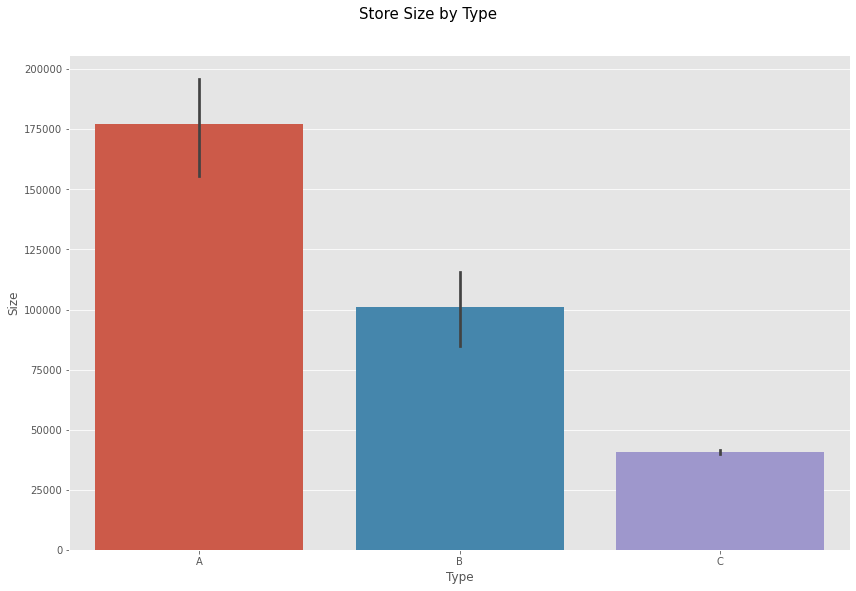

In [7]:
# Create figure and axis.
fig, ax = plt.subplots()
fig.suptitle("Store Size by Type", y=1.02)

# Plot size for each store type.
sns.barplot(data=cleaned_stores, x=cleaned_stores.Type, y=cleaned_stores.Size, ax=ax)

# Clean up whitespace padding.
fig.tight_layout()

# Display plots.
plt.show()

The above shows that the biggest stores are Type A, then Type B and the smallest of Type C. 

<br>

#### Train.


In [8]:
# Load the train.csv without an index.
train = pd.read_csv("Walmart Data Set/train.csv", index_col = False)

# Display the dafaframe.
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


The above dataframe contains weekly sales for 45 stores per department for the period from 2010-02-05 to 2012-10-26. It also includes the department number and whether the week is a special holiday week.

The dataframe doesn't have any empty values.

In [9]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [10]:
# Check for empty values.
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

<br>

#### Test.

In [11]:
# Load the test.csv without an index.
test = pd.read_csv("Walmart Data Set/test.csv", index_col = False)

# Display the dafaframe
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


We can see that the test dataframe is identical to the training set, except for the absence of the weekly sales and different time period. This set will be used for making predictions. 

In [12]:
# Check for empty values.
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

<br>

#### Features.

In [13]:
# Load the features.csv without an index.
features = pd.read_csv("Walmart Data Set/features.csv", index_col = False)

# Display the dafaframe
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


The features file contains additional data related to the store, department, and regional activity for the given dates. MarkDown columns are related to promotional markdowns that Walmart is running.

In [14]:
# Check for empty values.
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

<br>

### Mergining data sets.
___

In [15]:
# Merge the dataframes into one.
new_frame = pd.merge(cleaned_stores, train)
df = pd.merge(new_frame, features)

# Display the new dataframe.
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,44,C,39910,94,2012-10-26,26641.59,False,46.97,3.755,38.65,2.61,0.98,NaN,457.74,131.193097,5.217
421566,44,C,39910,95,2012-10-26,32196.45,False,46.97,3.755,38.65,2.61,0.98,NaN,457.74,131.193097,5.217
421567,44,C,39910,96,2012-10-26,2983.19,False,46.97,3.755,38.65,2.61,0.98,NaN,457.74,131.193097,5.217
421568,44,C,39910,97,2012-10-26,7054.80,False,46.97,3.755,38.65,2.61,0.98,NaN,457.74,131.193097,5.217
